In [1]:
import numpy
import jupyter
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [2]:
#使用sklearn库的load_svmlight_file函数读取数据
x, y = load_svmlight_file("australian_scale")

#使用train_test_split函数切分数据集，test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train, x_test = x_train.toarray(), x_test.toarray()
y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))

#为X_train和X_test加上一列，置为1，也就是w0，截距项
X_train = numpy.hstack([x_train, numpy.ones((x_train.shape[0], 1))])
X_test = numpy.hstack([x_test, numpy.ones((x_test.shape[0], 1))])


#调节参数alpha，即学习率
alpha = 0.0001
#设置梯度下降的次数iteration
iteration=2000

In [3]:
#定义Loss函数和梯度函数
def loss_and_gradient(x, y, x_test, y_test, w, C):
    loss = 0
    test_loss = 0
    train_num, dimension = x.shape[0], x.shape[1]
    gradient = numpy.zeros((1,dimension))
    y_predict = x.dot(w.T)
    y_test_predict = x_test.dot(w.T)

    for m in range(train_num):
        if y[m,0]*y_predict[m,0] < 1: 
            loss = loss + 1 - y[m,0]*y_predict[m,0]
    for m in range(y_test.shape[0]):
        if y_test[m,0]*y_test_predict[m,0] <1:
            test_loss = test_loss + 1 - y_test[m,0]*y_test_predict[m,0]
    for d in range(dimension):
        loss = loss + 0.5*C*w[0,d]*w[0,d] 
        test_loss = test_loss + 0.5*C*w[0,d]*w[0,d]
        # gradient = C*w - x*y
        gradient[0,d] = abs(C*w[0,d]) 
        for m in range(train_num):
            if y[m,0]*y_predict[m,0] < 1:
                gradient[0,d] = gradient[0,d] - y[m,0]*x[m,d]
    return loss, test_loss, gradient

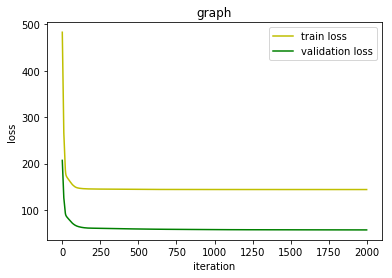

0


In [4]:
#更新模型参数
def update(w, grad, lr):
    for d in range(w.shape[1]):
        w[0, d] = w[0, d] - lr * grad[0, d]

#训练模型
def train(x, y, x_test, y_test, C, lr, iteration):
    train_num, dimension = x.shape[0], x.shape[1]
    w = numpy.zeros((1, dimension))
    loss_history = numpy.zeros((iteration, 1))
    test_loss_history = numpy.zeros((iteration, 1))
    
    #循环iteration次训练模型
    
    for iter in range(iteration):
        loss_history[iter, 0], test_loss_history[iter,
                                                 0], gradient = loss_and_gradient(x, y, x_test, y_test, w, C)
        update(w, gradient, lr)
    return w, loss_history, test_loss_history


#得到预测值y_predict
def predict(x, w):
    y_predict = x.dot(w.T)
    for i in range(x.shape[0]):
        if y_predict[i, 0] >= 0:
            y_predict[i, 0] = 1
        else:
            y_predict[i, 0] = -1
    return y_predict



#开始训练
w, loss_history, test_loss_history = train(
    X_train, y_train, X_test, y_test, 0.3, alpha, iteration)
y_predict = predict(X_test, w)
loss = 0


pyplot.plot(loss_history, 'y', label='train loss')
pyplot.plot(test_loss_history, 'g', label='validation loss')
pyplot.legend(loc='upper right')
pyplot.ylabel('loss')
pyplot.xlabel('iteration')
pyplot.title('graph')
pyplot.show()
print(loss)


In [5]:
print(test_loss_history[-1])
print(loss_history[-1])

[ 57.22804283]
[ 144.1910702]


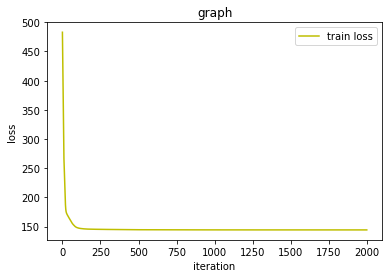

0


In [6]:
pyplot.plot(loss_history, 'y', label='train loss')
pyplot.legend(loc='upper right')
pyplot.ylabel('loss')
pyplot.xlabel('iteration')
pyplot.title('graph')
pyplot.show()
print(loss)